<a href="https://colab.research.google.com/github/alexiscaphar/my-first-repo/blob/main/linear%20regression%20101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [3]:
# Load dataset
df = fetch_california_housing(as_frame=True).frame

# View head
df.sample(5)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
17190,5.1002,30.0,5.501992,1.181275,1581.0,3.149402,37.24,-122.27,3.194
13896,1.5489,13.0,5.650000,1.284375,735.0,2.296875,34.15,-116.33,0.574
5097,2.1221,50.0,5.509709,1.094660,1000.0,2.427184,33.97,-118.30,1.194
8317,2.7361,52.0,6.225000,1.650000,341.0,2.131250,33.34,-118.32,4.500
2760,2.0625,6.0,4.720539,0.978114,2807.0,4.725589,32.67,-115.52,0.677


In [5]:
# Round to the nearest multiple of 10 and floor the result
df['HouseAge'] = (np.floor(df['HouseAge'].div(10)) * 10).astype(int).astype(str)

In [4]:
# Print schema
df.info()


# Describe numeric features
df.describe()


# Describe categorical features
df.groupby('HouseAge').size()  # Can also use `df['HouseAge'].value_counts()`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,0
HouseAge,
1.0,4
2.0,58
3.0,62
4.0,191
5.0,244
6.0,160
7.0,175
8.0,206
9.0,205


In [6]:
# Apply a mask to the whole dataset and sum column-wise
df.isna().sum()  # Looks good!

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


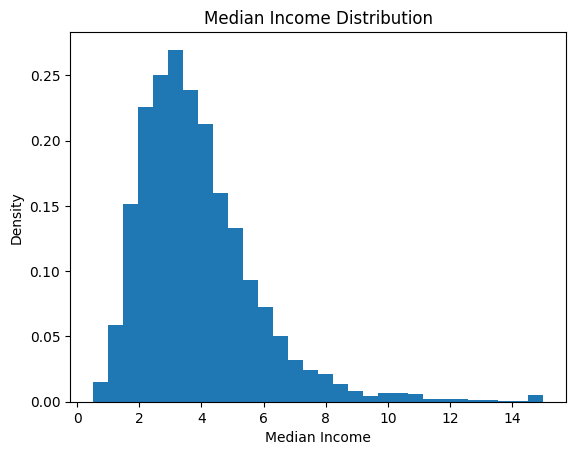

In [7]:
# Main plot
plt.hist(x=df['MedInc'], bins=30, density=True)

# Aesthetics
plt.title('Median Income Distribution')
plt.xlabel('Median Income')
plt.ylabel('Density')

# Show
plt.show()  # plt.savefig('hist_medinc.png', dpi=2000)  # to save a fig


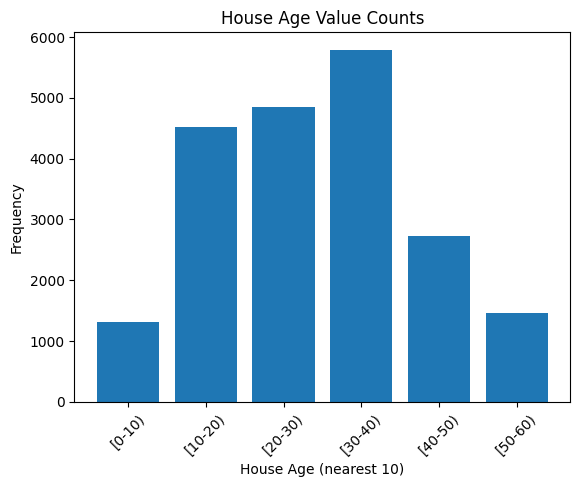

In [8]:
df.groupby('HouseAge').size().reset_index(name='count')


[f'[{i}-{i + 10})' for i in np.arange(0, 60, step=10)]


# Create temporary table where we'll store our groupby
temp = df.groupby('HouseAge').size().reset_index(name='count')

# Plot it
plt.bar(x=temp['HouseAge'], height=temp['count'])

# Aesthetics
plt.title('House Age Value Counts')
plt.xlabel('House Age (nearest 10)')
plt.ylabel('Frequency')
plt.xticks(
    ticks=range(6),
    labels=[f'[{i}-{i + 10})' for i in np.arange(0, 60, step=10)],
    rotation=45
)

# Show
plt.show()


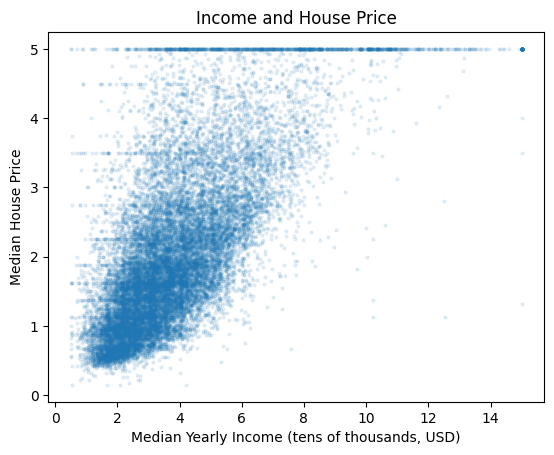

In [9]:
# Main plot
plt.scatter(x=df['MedInc'], y=df['MedHouseVal'], s=4, alpha=0.1)

# Aesthetics
plt.title('Income and House Price')
plt.xlabel('Median Yearly Income (tens of thousands, USD)')
plt.ylabel('Median House Price')

# Show
plt.show()

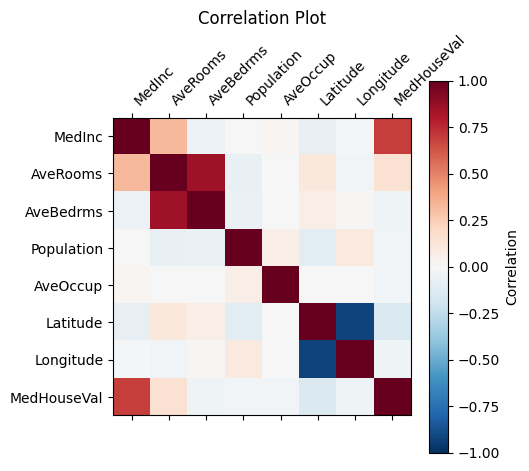

In [10]:
# Declare list with numeric columns
cols_numeric = [
    col for col in df.columns if pd.api.types.is_numeric_dtype(df.dtypes[col])
]

# Main plot
plt.matshow(A=df[cols_numeric].corr().values, cmap='RdBu_r', vmin=-1, vmax=1)

# Aesthetics
plt.colorbar(label='Correlation')  # Shows values:color
plt.title('Correlation Plot')
plt.xticks(
    ticks=range(len(cols_numeric)),
    labels=cols_numeric,
    rotation=45,
    ha='left'
)
plt.yticks(
    ticks=range(len(cols_numeric)),
    labels=cols_numeric,
    ha='right'
)

# Show
plt.show()


Feature engineering


In [11]:
pd.get_dummies(
    data=df[['HouseAge']],  # With column to be encoded
    prefix='HouseAge',
    dummy_na=False,
    drop_first=False,
    dtype=int
)

,HouseAge_0,HouseAge_10,HouseAge_20,HouseAge_30,HouseAge_40,HouseAge_50
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
20635,0,0,1,0,0,0
20636,0,1,0,0,0,0
20637,0,1,0,0,0,0
20638,0,1,0,0,0,0


In [12]:
# Add a constant term (not strictly necessary, but worth having)
df['Const'] = 1

# Turn HouseAge to binary columns (OHE) and paste that to df (without replacing)
df = pd.concat(
    objs=[
        df,  # Itself
        pd.get_dummies(
            data=df[['HouseAge']],  # With column to be encoded
            prefix='HouseAge',
            dummy_na=False,
            drop_first=False,
            dtype=int
        )
    ],
    axis=1
)


Fitting models

In [13]:
# Declare categorical features separately
cols_ohe = [f'HouseAge_{i}' for i in np.arange(10, 60, step=10)]  # Set 0 as baseline
cols_m0 = ['Const', 'AveBedrms', 'AveRooms', 'MedInc'] + cols_ohe

# Baseline model
m0 = sm.OLS(
    endog=df['MedHouseVal'],
    exog=df[cols_m0],
    hasconst=True
)

# Fit
m0_res = m0.fit()

# View results
print(m0_res.summary())  # Try adding .as_latex()

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     3048.
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        01:14:29   Log-Likelihood:                -24191.
No. Observations:               20640   AIC:                         4.840e+04
Df Residuals:                   20631   BIC:                         4.847e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Const          -0.2503      0.030     -8.295      

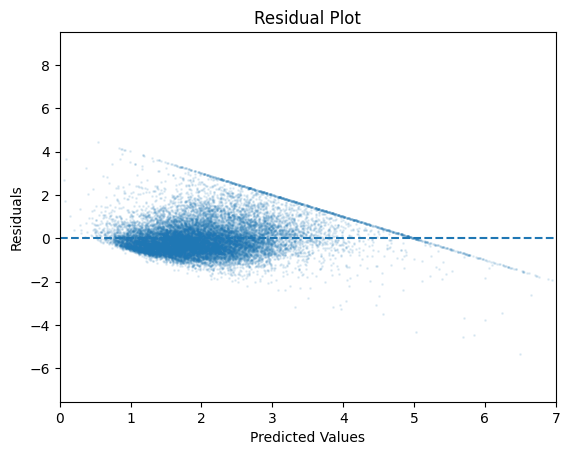

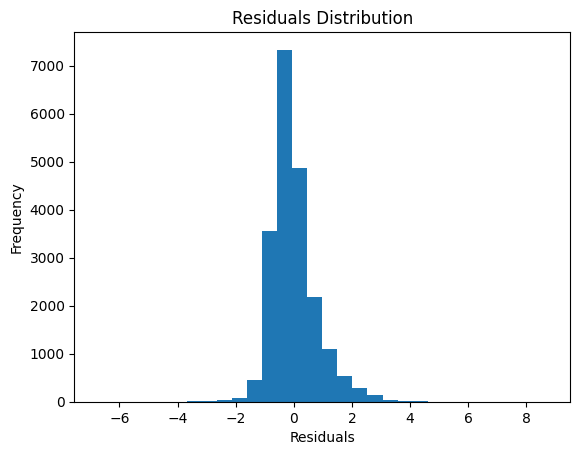

In [14]:
# Main plot
plt.scatter(m0_res.fittedvalues, m0_res.resid, s=1, alpha=0.1)
plt.axhline(ls='--')

# Aesthetics
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xlim(0, 7)

# Show
plt.show()


# Main plot
plt.hist(m0_res.resid, bins=30)

# Aesthetics
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Aesthetics
plt.show()

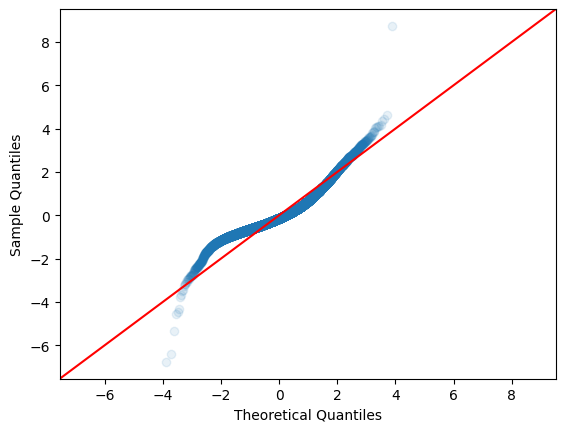

In [15]:
sm.qqplot(data=m0_res.resid.values, line='45', alpha=0.1)
plt.show()


In [16]:
# Mask to drop censored entries
mask = df['MedHouseVal'].lt(5)

# Model on non-censored values
m1 = sm.OLS(
    endog=df.loc[mask, 'MedHouseVal'],
    exog=df.loc[mask, cols_m0],
    hasconst=True
)

# Fit
m1_res = m1.fit()

# View results
print(m1_res.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     2453.
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        01:15:50   Log-Likelihood:                -20496.
No. Observations:               19648   AIC:                         4.101e+04
Df Residuals:                   19639   BIC:                         4.108e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Const          -0.2583      0.029     -8.960      

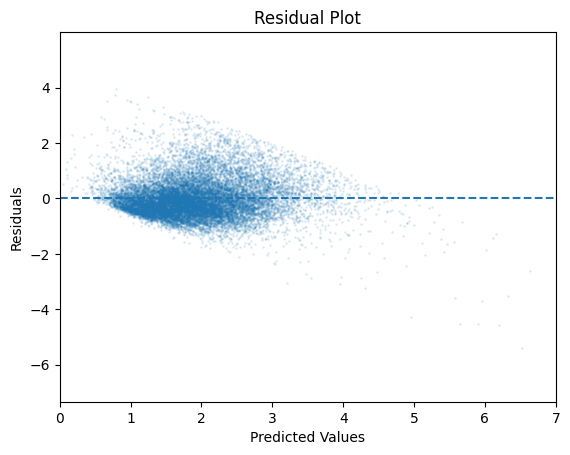

In [17]:
# Main plot
plt.scatter(x=m1_res.fittedvalues, y=m1_res.resid, s=1, alpha=0.1)
plt.axhline(ls='--')

# Aesthetics
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xlim(0, 7)

# Show
plt.show()

In [18]:
# Model on non-censored values
m2 = sm.OLS(
    endog=df.loc[mask, 'MedHouseVal'],
    exog=df.loc[mask, cols_m0],
    hasconst=True
)

# Fit
m2_res = m2.fit(cov_type='HC0')

# View results
print(m2_res.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     1326.
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        01:16:18   Log-Likelihood:                -20496.
No. Observations:               19648   AIC:                         4.101e+04
Df Residuals:                   19639   BIC:                         4.108e+04
Df Model:                           8                                         
Covariance Type:                  HC0                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Const          -0.2583      0.069     -3.747      